In [7]:
import tensorflow as tf

In [9]:
from tensorflow import keras

In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
print(tf.__version__)

1.14.0


In [15]:
fashion_mnist=keras.datasets.fashion_mnist

In [16]:
(train_images, train_labels), (test_images, test_labels)=fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [18]:
class_names=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [21]:
train_images.shape

(60000, 28, 28)

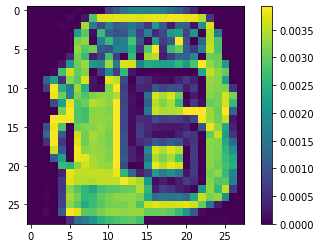

In [39]:
plt.figure
plt.imshow(train_images[6000])
plt.colorbar()
plt.grid(False)
plt.show()

In [31]:
train_images=train_images/255.0

In [32]:
test_images=test_images/255.0

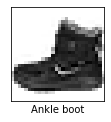

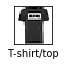

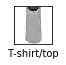

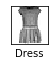

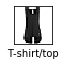

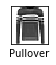

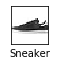

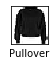

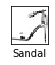

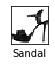

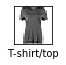

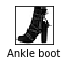

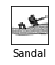

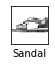

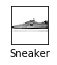

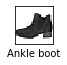

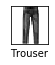

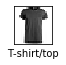

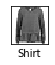

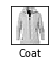

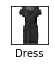

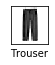

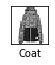

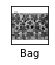

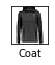

In [42]:
#데이터 전처리

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
    plt.show()

In [46]:
#층 설정

model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  #28*28= 784 픽셀의 1차원 배열로 변환 이미지에 있는 픽셀의 행을 펼친다.
    keras.layers.Dense(128, activation='relu'),  #dense층은 128개의 노드를 가진다.   
    keras.layers.Dense(10, activation='softmax') #10개의 노드의 소프트맥스층 10개의 확률을 반환 반환된 값은 1 
])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [49]:
#모델 컴파일

#손실함수: 훈련 하는 동안 모델의 오차를 측정합니다. 모델의 학습이 올바른 방향으로 향하도록 함수를 최소화해야 한다.
#옵티마이저: 데이터와 손실함수를 바탕으로 모델의 업데이트 방법을 결정한다.
#지표(metrix): 훈련단계와 테스트 단계를 모니터링하기 위해 사용한다.
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [56]:
#모델 훈련
#1.훈련데이터를 모델에 주입 train_images와 train_labels
#2.모델이 이미지와 레이블을 매핑하는 방법을 배운다.
#3.테스트에 대한 모델의 예측을 만든다. test_images 이 예측이 test_labels 레이블과 맞는지 확인한다.
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 7s 113us/sample - loss: 1.1200 - acc: 0.6492s - loss: 1.3520 - acc: 0. - ETA: 2s - los
Epoch 2/5
60000/60000 [==============================] - 6s 105us/sample - loss: 0.6501 - acc: 0.7667s - loss: 0.6934 - a - ETA: 4s - loss: 0.6874 - acc:
Epoch 3/5
60000/60000 [==============================] - 6s 100us/sample - loss: 0.5734 - acc: 0.7946s - loss: 0.5740 - acc: 0.79
Epoch 4/5
60000/60000 [==============================] - 6s 108us/sample - loss: 0.5304 - acc: 0.8115ETA: 1s - loss: 
Epoch 5/5
60000/60000 [==============================] - 6s 101us/sample - loss: 0.5021 - acc: 0.8226


In [57]:
#정확도 평가

test_loss, test_acc= model.evaluate(test_images, test_labels, verbose=2)
print('\n테스트 정확도:',test_acc)

10000/10000 - 0s - loss: 115.6763 - acc: 0.6582

테스트 정확도: 0.6582


In [58]:
predictions=model.predict(test_images)

In [60]:
predictions[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [64]:
np.argmax(predictions[1])   # class 2라고 예측

2

In [83]:
test_labels[1]              #위 내용과 일치하는지 확인

2

In [84]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

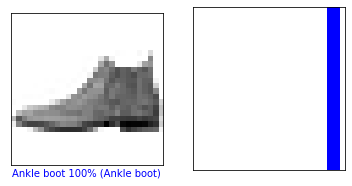

In [85]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

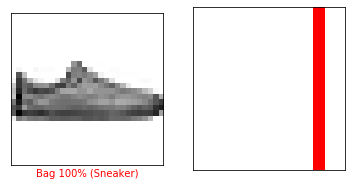

In [87]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

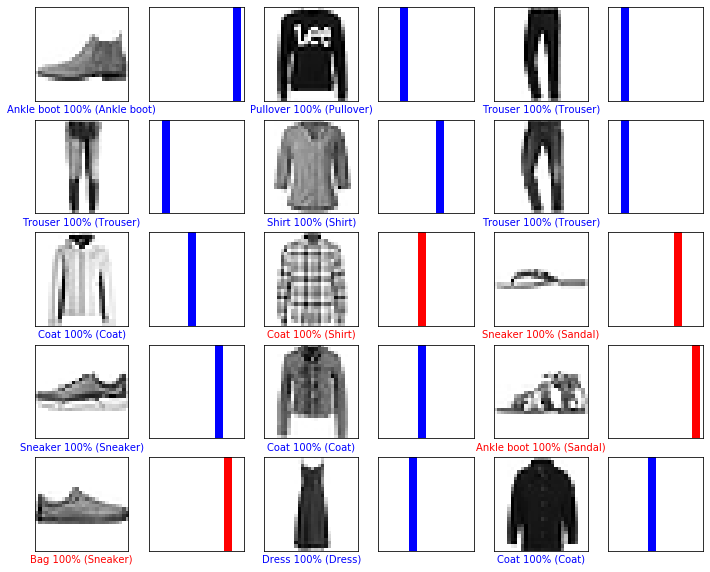

In [88]:
# 처음 X 개의 테스트 이미지와 예측 레이블, 진짜 레이블을 출력합니다
# 올바른 예측은 파랑색으로 잘못된 예측은 빨강색으로 나타냅니다
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

In [89]:
# 테스트 세트에서 이미지 하나를 선택합니다
img = test_images[0]

print(img.shape)

(28, 28)


In [90]:
# 이미지 하나만 사용할 때도 배치에 추가합니다
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [91]:
predictions_single = model.predict(img)

print(predictions_single)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


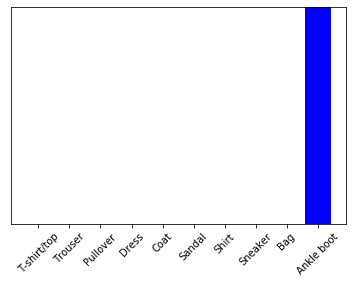

In [92]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [93]:
np.argmax(predictions_single[0])

9